In [9]:
# import necessary packages
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from descartes import PolygonPatch
from tqdm import tqdm

In [2]:
df = pd.read_csv("data/full_run_2.zip",skiprows=6)

In [3]:
#remove all the columns that have the same value in all rows.
for c in df.columns:
    if len(df[c].unique()) < 2:
        df = df.drop(columns=c)

In [4]:
#remove all rows with no data, these are usually the rows at the start of a run.
l = []
for r in df.index:
    if len(df.iloc[r,5:].unique())<2:
        l.append(r)

df = df.drop(index=l)

In [5]:
#shape of the imported file vs reduced files shows only step[0] of each run has no results. Great news!

In [6]:
#I found this code to make dict from long list.
def listToDict(lst):
    op = {lst[i]: lst[i + 1] for i in range(0, len(lst), 2)}
    return op

In [10]:
steps = []
n_steps = 20000 
for index, row in tqdm(df.iloc[:n_steps,:].iterrows(), total=n_steps):
    l = []
    for column in df.columns[:5]:
        x = row[column]
        new_df = pd.DataFrame(index=np.arange(0,114), columns=[column])
        new_df[column] = x
        l.append(new_df)
    for column in df.columns[5:]:
        x = row[column].replace("[","").replace("]","").split(" ")
        d = listToDict(x)
        new_df = pd.DataFrame(index=np.arange(0, len(d)), columns=['Neighborhood number', column])
        new_df['Neighborhood number'] = [*d]
        new_df[column] = list(d.values())
        l.append(new_df)
        # empty_df.loc[index, column] = x
    steps.append(pd.concat(l, axis=1))

 51%|██████████████████████████████████████▉                                     | 10240/20000 [05:29<05:13, 31.10it/s]


In [11]:
full_df = pd.concat(steps).loc[:,~pd.concat(steps).columns.duplicated()]

In [12]:
full_df = full_df.astype({'Neighborhood number' : int,
       'KPI-available_buy_houses' : float, 'KPI-available_part_rent_houses' : float,
       'KPI-available_social_rent_houses' : float, 'KPI-avg_income' : float, 'KPI-avg_price' : float,
       'KPI-avg_utility' : float, 'KPI-citizen-count' : float, 'KPI-p-sc-lower' : float,
       'KPI-p-sc-working' : float, 'KPI-p-sc-middle' : float, 'KPI-p-sc-upper' : float, 'KPI-p-dutch' : float,
       'KPI-p-other-western' : float, 'KPI-p-antilles' : float, 'KPI-p-morocco' : float,
       'KPI-p-suriname' : float, 'KPI-p-turkey' : float, 'KPI-p-indonesian' : float,
       'KPI-p-eastern-eu' : float, 'KPI-p-other-nonwestern' : float})

In [13]:
full_df.describe()

,[run number],[step],Neighborhood number,KPI-available_buy_houses,KPI-available_part_rent_houses,KPI-available_social_rent_houses,KPI-avg_income,KPI-avg_price,KPI-avg_utility,KPI-citizen-count,...,KPI-p-sc-upper,KPI-p-dutch,KPI-p-other-western,KPI-p-antilles,KPI-p-morocco,KPI-p-suriname,KPI-p-turkey,KPI-p-indonesian,KPI-p-eastern-eu,KPI-p-other-nonwestern
count,1.167360e+06,1.167360e+06,1.167360e+06,1.167360e+06,1.167360e+06,1.167360e+06,1.167360e+06,1.167360e+06,1.167360e+06,1.167360e+06,...,1.167360e+06,1.167360e+06,1.167360e+06,1.167360e+06,1.167360e+06,1.167360e+06,1.167360e+06,1.167360e+06,1.167360e+06,1.167360e+06
mean,1.285000e+02,2.050000e+01,6.199123e+01,2.287239e+03,1.368954e+03,1.245927e+03,3.957101e+04,3.597286e+05,2.461786e-01,2.614393e+03,...,2.491710e-01,4.499723e-01,1.112979e-01,2.752802e-02,3.851937e-02,3.388579e-02,6.444538e-02,5.217183e-02,5.983048e-02,1.258255e-01
std,7.390030e+01,1.154340e+01,3.556377e+01,4.545315e+03,3.343768e+03,2.315815e+03,2.025859e+04,1.883285e+05,8.628507e-01,3.274963e+03,...,3.124551e-01,2.729522e-01,1.139288e-01,8.722302e-02,1.045184e-01,2.657917e-02,7.892910e-02,1.009814e-01,1.274297e-01,1.847508e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.605000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.475000e+01,1.075000e+01,3.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,2.430200e+04,2.217910e+05,1.350000e-01,5.050000e+02,...,0.000000e+00,1.890000e-01,3.500000e-02,6.000000e-03,3.000000e-03,1.400000e-02,1.300000e-02,4.000000e-03,1.700000e-02,5.600000e-02
50%,1.285000e+02,2.050000e+01,6.450000e+01,4.400000e+02,4.500000e+01,1.210000e+02,3.647000e+04,3.295130e+05,2.610000e-01,1.376000e+03,...,5.400000e-02,5.450000e-01,9.300000e-02,1.200000e-02,1.400000e-02,3.400000e-02,3.500000e-02,1.500000e-02,3.000000e-02,8.700000e-02
75%,1.922500e+02,3.025000e+01,9.300000e+01,2.141000e+03,9.540000e+02,1.539000e+03,4.813000e+04,4.425450e+05,4.950000e-01,3.502000e+03,...,5.150000e-01,6.280000e-01,1.600000e-01,2.300000e-02,3.500000e-02,5.000000e-02,9.300000e-02,4.300000e-02,4.600000e-02,1.150000e-01
max,2.560000e+02,4.000000e+01,1.210000e+02,2.571400e+04,2.463200e+04,1.489500e+04,9.943200e+04,9.294180e+05,5.063000e+00,2.118600e+04,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


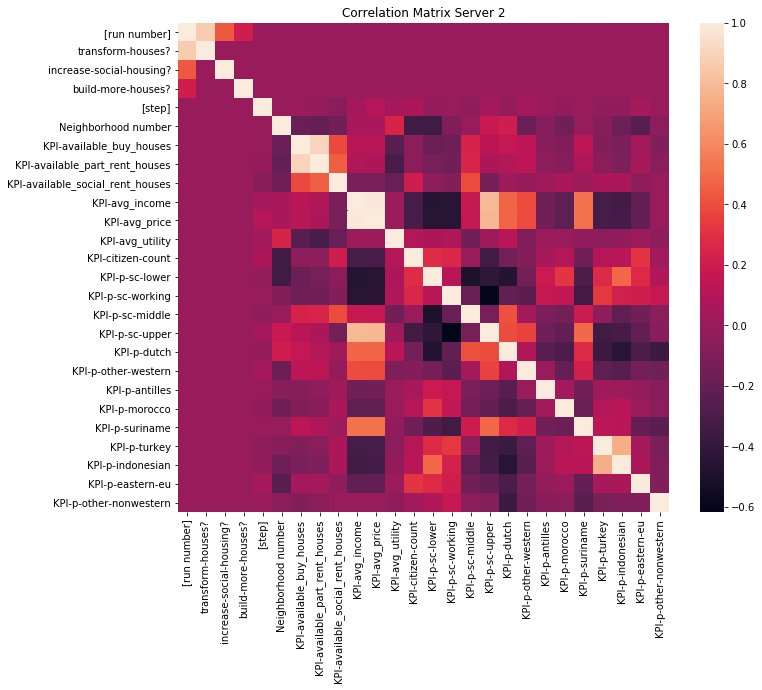

In [17]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(full_df.corr())
plt.title("Correlation Matrix Server 2")
plt.savefig('output/images/corr_2.png')

In [16]:
#this is for the report~
print(full_df.describe().round(2).T.drop(columns="count").to_latex(longtable=True))

\begin{longtable}{lrrrrrrr}
\toprule
{} &       mean &        std &  min &        25\% &        50\% &        75\% &        max \\
\midrule
\endhead
\midrule
\multicolumn{8}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
[run number]                     &     128.50 &      73.90 &  1.0 &      64.75 &     128.50 &     192.25 &     256.00 \\
[step]                           &      20.50 &      11.54 &  1.0 &      10.75 &      20.50 &      30.25 &      40.00 \\
Neighborhood number              &      61.99 &      35.56 &  1.0 &      32.00 &      64.50 &      93.00 &     121.00 \\
KPI-available\_buy\_houses         &    2287.24 &    4545.31 &  0.0 &       1.00 &     440.00 &    2141.00 &   25714.00 \\
KPI-available\_part\_rent\_houses   &    1368.95 &    3343.77 & -1.0 &       0.00 &      45.00 &     954.00 &   24632.00 \\
KPI-available\_social\_rent\_houses &    1245.93 &    2315.81 &  0.0 &       0.00 &     121.00 &    1539.00 &   14895.00 \\
KPI-avg\_income 